# Analysis: 20251107

In [ ]:
!pip install nucleus-cdk | tail -n2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cdk.analysis.cytosol import platereader as pr

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [2]:
data_file = "./20251107-cytation3-pure-timecourse-gfp-MgSweep-biotek-cdk.txt"
platemap_file = "./20251107-NucleusPURE-deGFP-MgSweep-platemap.csv"

data, platemap = pr.load_platereader_data(data_file, platemap_file)

# Basic Analysis

## Curves
Curves of RFU over time, by named sample.

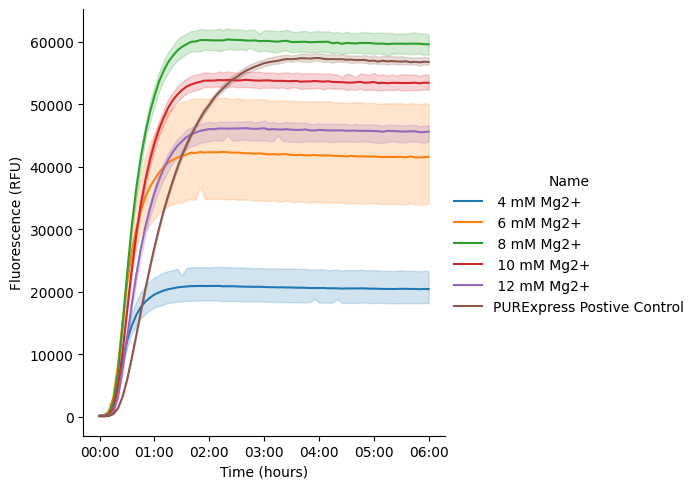

In [3]:
#| label: fig:kinetics-exp2

K=pr.plot_curves(data)
K.savefig('Kinetics')

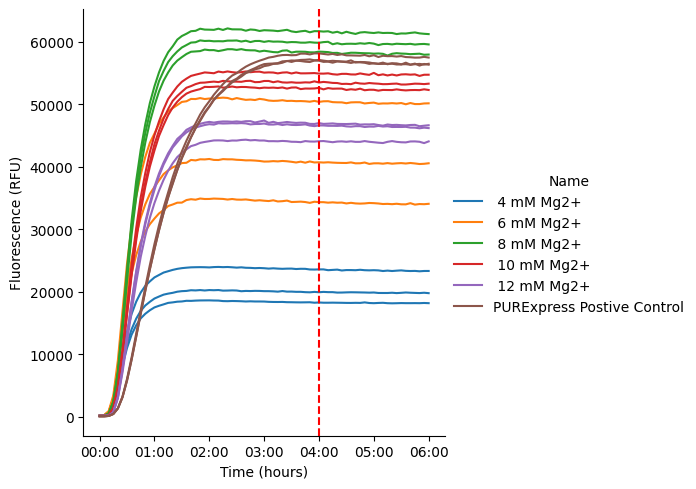

In [4]:
K=pr.plot_curves(data, units="Well", estimator=None)
K.axes.flatten()[0].axvline(pd.to_timedelta("04:00:00"), c="red", ls="--")
K.savefig('Kinetics2')

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

There's something weird going on with solving the kinetics. In the meantime, pick an appropriate-looking time for which to calculate steady state and use that. Here we chose four hours.

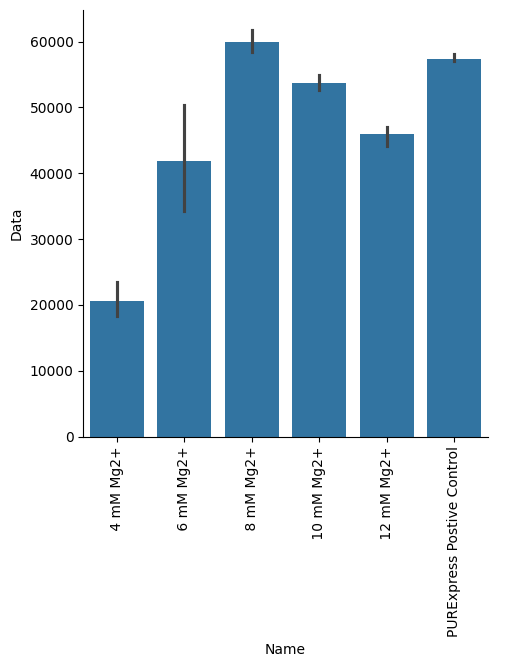

In [5]:
#| label: fig:endpoint-exp2

g = sns.catplot(
    data=data[data["Time"] == "04:00:00"],
    x="Name",
    y="Data",
    kind="bar"
)

g.set_xticklabels(rotation=90)
g.savefig('Steadystate')

/opt/conda/lib/python3.13/site-packages/cdk/analysis/cytosol/platereader.py:689: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data.groupby(["Well", "Read"]).apply(find_steady_state_for_well)


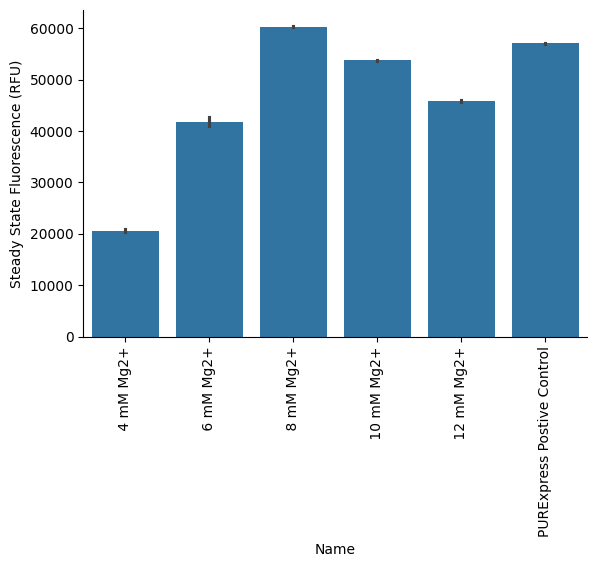

In [6]:
S= pr.plot_steadystate(data)
S.savefig('endpoint')

## Kinetics
These functions calculate key kinetic parameters of the time series.

In [24]:
data["Read"].unique()

array(['GFP-F-G35'], dtype=object)

In [6]:
pr.kinetic_analysis(data, group_by=["Well"])

Failed to solve for group D3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group D5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F7: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H7: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group J3: Optimal parameters not found: Number of calls to f

Velocity                                      Lag  \
                          Time     Data   Max                      Time   
Well                                                                      
B3   0 days 00:29:46.570988185 29132.92 18.33 0 days 00:16:30.968986020   
B5   0 days 00:29:18.736184062 28250.00 17.92 0 days 00:16:21.891139379   
B7   0 days 00:28:50.861533618 28195.87 17.80 0 days 00:16:09.362651717   
D3                         NaT      NaN   NaN                       NaT   
D5                         NaT      NaN   NaN                       NaT   
D7   0 days 00:29:23.050730696 31616.27 20.02 0 days 00:16:44.077201448   
F3                         NaT      NaN   NaN                       NaT   
F5                         NaT      NaN   NaN                       NaT   
F7                         NaT      NaN   NaN                       NaT   
H3                         NaT      NaN   NaN                       NaT   
H5                         NaT      NaN   NaN                       NaT   
H7                         NaT      NaN   NaN                       NaT   
J3                         NaT      NaN   NaN                       NaT   
J5                         NaT      NaN   NaN                       NaT   
J7                         NaT      NaN   NaN                       NaT   

                          Steady State           \
        Data                      Time     Data   
Well                                              
B3   8286.59 0 days 01:08:46.456668754 58265.83   
B5   8083.07 0 days 01:07:59.798789728 56500.01   
B7   8070.51 0 days 01:07:43.482117678 56391.74   
D3       NaN                       NaT      NaN   
D5       NaN                       NaT      NaN   
D7   9134.64 0 days 01:08:07.748515107 63232.55   
F3       NaN                       NaT      NaN   
F5       NaN                       NaT      NaN   
F7       NaN                       NaT      NaN   
H3       NaN                       NaT      NaN   
H5       NaN                       NaT      NaN   
H7       NaN                       NaT      NaN   
J3       NaN                       NaT      NaN   
J5       NaN                       NaT      NaN   
J7       NaN                       NaT      NaN   

                                                    Fit             
                                                 params  R^2 drift  
Well                                                                
B3    [58265.83030097485, 0.0012583687329762708, 178... 1.00 -0.02  
B5    [56500.00576673873, 0.0012685737006744335, 175... 1.00 -0.01  
B7    [56391.740848343645, 0.001262288003152744, 173... 1.00 -0.01  
D3                                                  NaN  NaN   NaN  
D5                                                  NaN  NaN   NaN  
D7    [63232.548385128226, 0.0012665900053383404, 17... 1.00 -0.02  
F3                                                  NaN  NaN   NaN  
F5                                                  NaN  NaN   NaN  
F7                                                  NaN  NaN   NaN  
H3                                                  NaN  NaN   NaN  
H5                                                  NaN  NaN   NaN  
H7                                                  NaN  NaN   NaN  
J3                                                  NaN  NaN   NaN  
J5                                                  NaN  NaN   NaN  
J7                                                  NaN  NaN   NaN

Failed to solve for group D3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group D5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group F7: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H3: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H5: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group H7: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Failed to solve for group J3: Optimal parameters not found: Number of calls to f

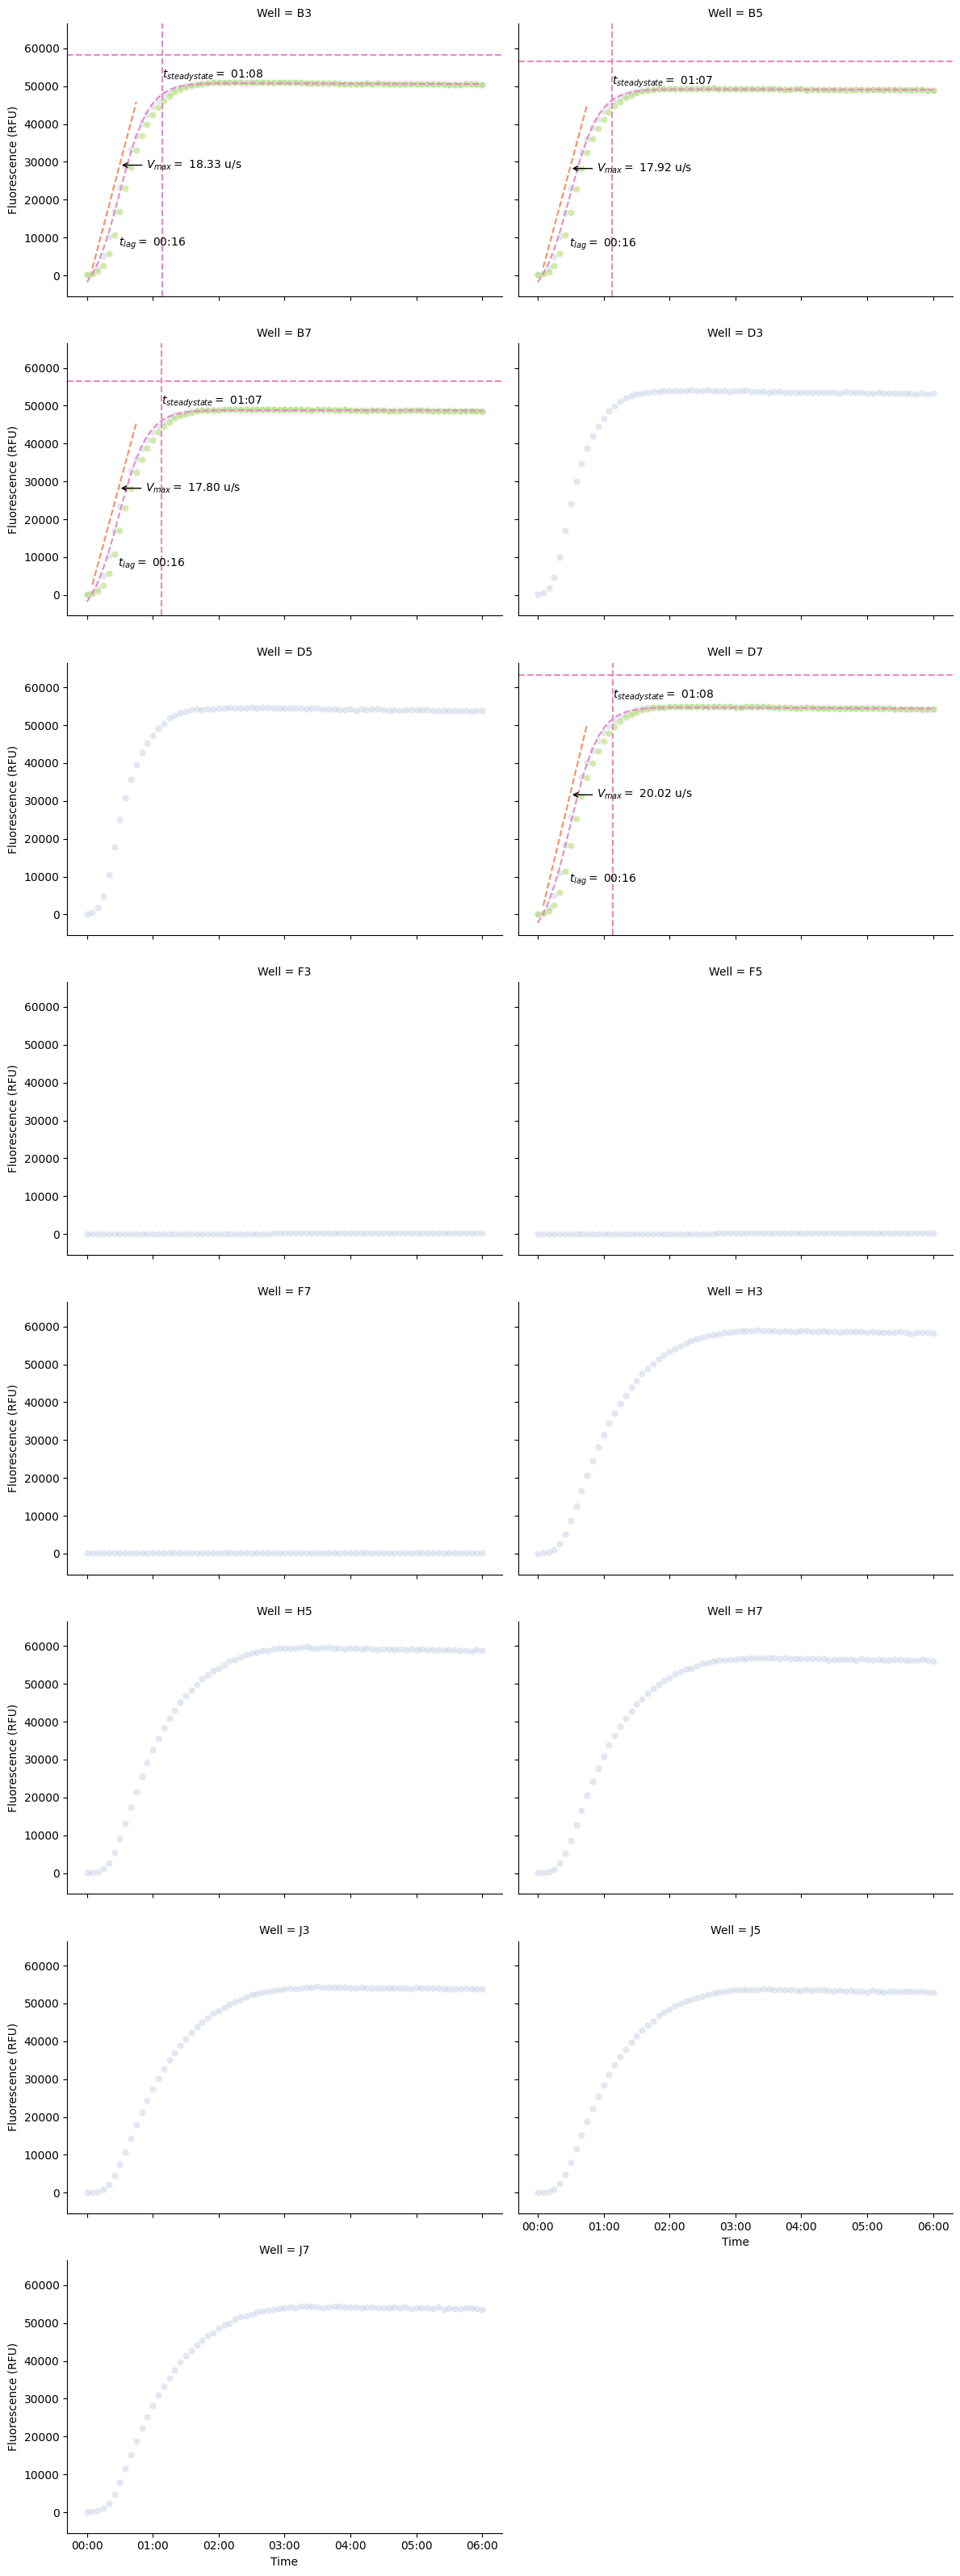

In [9]:
pr.plot_kinetics(data, group_by=["Well"])

We can also calculate the kinetics and display the parameters as a table.

In [9]:
pr.kinetic_analysis(data)

Velocity                 \
                                                        Time     Data   Max   
Name                                                                          
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0 days 01:35:14 10641.00  4.52   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 0 days 02:15:14 33368.33  9.76   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 0 days 02:20:14 26377.67  7.42   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 0 days 02:35:14 14637.00  3.68   
PURExpress PC                                0 days 01:25:14 31047.33 16.68   

                                                                   Lag  \
                                                                  Time   
Name                                                                     
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0 days 00:56:01.531319086   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 0 days 01:18:14.724126153   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 0 days 01:20:58.525984723   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 0 days 01:29:01.352231604   
PURExpress PC                                0 days 00:54:12.731737644   

                                                         Steady State  \
                                                 Data            Time   
Name                                                                    
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG    3511.20 0 days 05:55:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 10623.36 0 days 05:50:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2  8273.40 0 days 05:50:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3  4394.39 0 days 05:40:14   
PURExpress PC                                11360.84 0 days 05:30:14   

                                                            Fit                \
                                                  Data        L    k       x0   
Name                                                                            
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG    26526.11 25497.92 0.00  6146.88   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 100380.67 97779.36 0.00  9686.66   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2  77243.00 75438.24 0.00  9914.31   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3  36507.67 36090.20 0.00 10237.86   
PURExpress PC                                 84208.78 81608.97 0.00  5675.61   

                                                   
                                              R^2  
Name                                               
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0.99  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 1.00  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 1.00  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 1.00  
PURExpress PC                                0.99